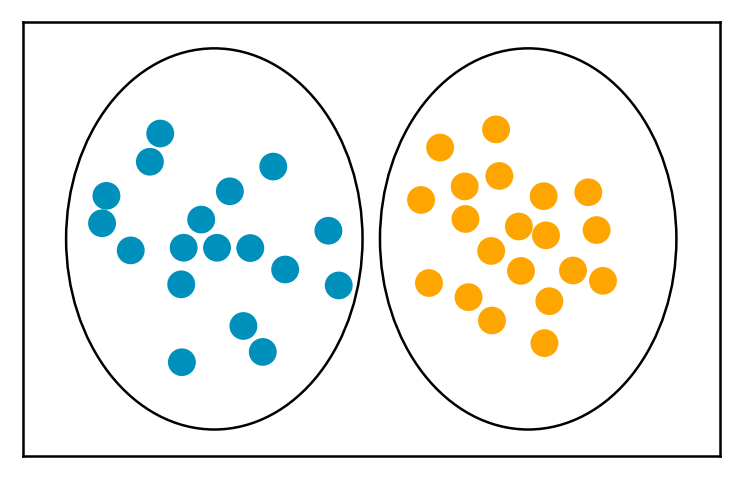

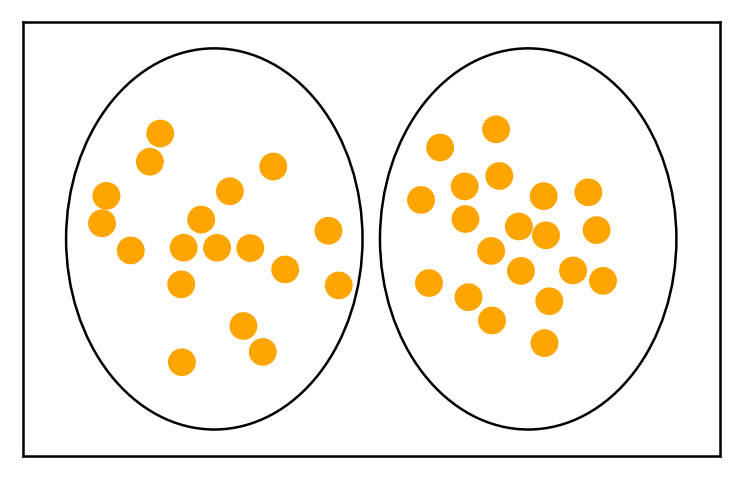

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Function to generate non-overlapping positions for dots inside a circle
def generate_non_overlapping_positions_in_circle(num_dots, dot_radius, x_center, y_center, circle_radius):
    positions = []
    for _ in range(num_dots):
        while True:
            angle = np.random.uniform(0, 2 * np.pi)
            r = np.random.uniform(0, circle_radius - dot_radius)
            x = x_center + r * np.cos(angle)
            y = y_center + r * np.sin(angle)
            if all(((x - x0) ** 2 + (y - y0) ** 2 >= (2 * dot_radius) ** 2) for x0, y0 in positions):
                positions.append((x, y))
                break
    return positions

# Function to draw circles
def draw_circles(ax, x_center, y_center):
    circle_width = 170
    circle_height = 220
    circle = Ellipse((x_center, y_center), circle_width, circle_height, edgecolor='black', linewidth=0.8, fill=False)
    ax.add_patch(circle)

# Calculate the radius for the large dots inside the circles
dot_radius = 8


# Define the number of dots for each color on each side
# Number of dots on each side should be between 9 and 21
# Need to Change: ratios on each side could be 4:3, or 7:6, 9:8 or 10:9
# 4:3   12 vs 9,   16 vs 12,  20 vs 15
# 7:6   14 vs 12,  21 vs 18
# 9:8   18 vs 16
# 10:9  10 vs 9,   20 vs 18
left_side_num = 18
right_side_num = 20

# Generate positions of dots
left_positions = generate_non_overlapping_positions_in_circle(left_side_num, dot_radius, 110, 125, 85)
right_positions = generate_non_overlapping_positions_in_circle(right_side_num, dot_radius, 290, 125, 85)

# Create a figure and axis for the "contrast" image
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=225)
draw_circles(ax, 110, 125)
draw_circles(ax, 290, 125)

# Draw blue and yellow dots in the "contrast" image
for x, y in left_positions:
    ax.add_patch(Ellipse((x, y), 16, 16, edgecolor='none', facecolor='#0090BC'))  # Blue Dots

for x, y in right_positions:
    ax.add_patch(Ellipse((x, y), 16, 16, edgecolor='none', facecolor='#FFA500'))

# Set axis limits
ax.set_xlim(0, 400)
ax.set_ylim(0, 250)

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])

# Save the "contrast colour" dots image
plt.savefig(f'dots_image_{left_side_num}x{right_side_num}_contrast.png', bbox_inches='tight', dpi=225) 

# Create a figure and axis for the "same colour" dots image
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=225)
draw_circles(ax, 110, 125)
draw_circles(ax, 290, 125)

# Draw yellow dots in both circles in the "same" image
for x, y in left_positions:
    ax.add_patch(Ellipse((x, y), 16, 16, edgecolor='none', facecolor='#FFA500'))

for x, y in right_positions:
    ax.add_patch(Ellipse((x, y), 16, 16, edgecolor='none', facecolor='#FFA500'))

# Set axis limits
ax.set_xlim(0, 400)
ax.set_ylim(0, 250)

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])

# Save the "same" image
plt.savefig(f'dots_image_{left_side_num}x{right_side_num}_same.png', bbox_inches='tight', dpi=225)

# Display the images
plt.show()
